In [4]:
import warnings
from typing import Any, Dict, Optional, Tuple, Union
import matplotlib.pyplot as plt
import matplotlib.ticker as mpl_ticker
import numpy as np
import pandas as pd
import scipy as sp
import databento as db

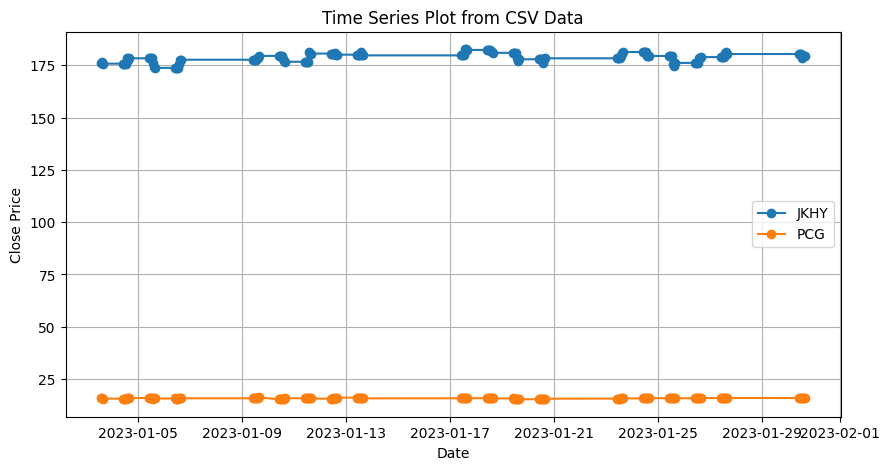

In [5]:
# Load and process CSV data
prices = pd.read_csv('data/stock/equity_table_singleday.csv')

# Convert 'ts_event' to datetime and set as index
prices['ts_event'] = pd.to_datetime(prices['ts_event'])
prices.set_index('ts_event', inplace=True)

# Drop columns and rows with all NaN values
prices.dropna(how='all', axis=1, inplace=True)
prices.dropna(subset=['JKHY'], inplace=True)

# Plot JKHY and PCG from CSV data
plt.figure(figsize=(10, 5))
plt.plot(prices.index, prices['JKHY'], marker='o', linestyle='-', label='JKHY')
plt.plot(prices.index, prices['PCG'], marker='o', linestyle='-', label='PCG')
plt.title('Time Series Plot from CSV Data')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend()
plt.show()

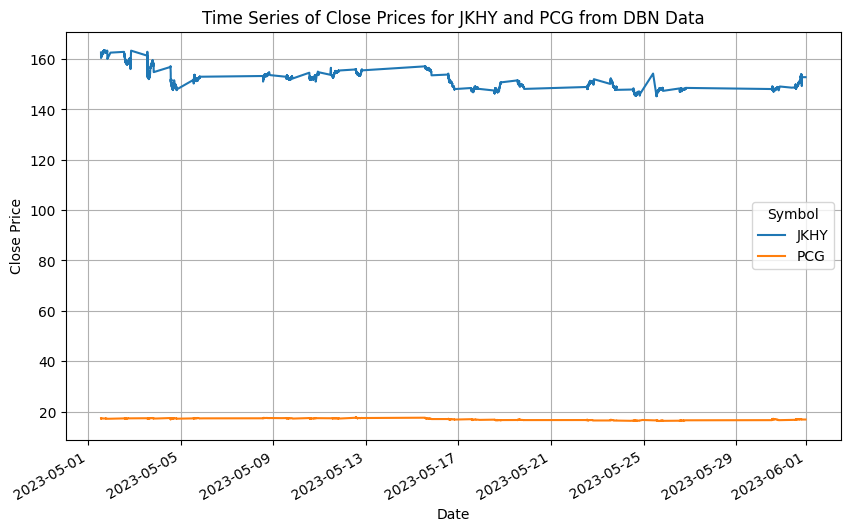

In [6]:
FIRST_MONTH_PATH = "./data/stock/xnas-itch-20230501-20230531.ohlcv-1m.dbn.zst"
stored_data = db.DBNStore.from_file(FIRST_MONTH_PATH)
df = stored_data.to_df()

# Pivot data to get close prices by minute for each symbol
train_prices = df.pivot_table(index='ts_event', columns='symbol', values='close', aggfunc='first')

# Interpolate missing values
tp_interp = train_prices.interpolate(method='time')

# Select the JKHY and PCG columns
selected_symbols = tp_interp[['JKHY', 'PCG']]

# Plot the time series for the selected symbols from DBN data
selected_symbols.plot(figsize=(10, 6))
plt.title('Time Series of Close Prices for JKHY and PCG from DBN Data')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.legend(title='Symbol')
plt.show()

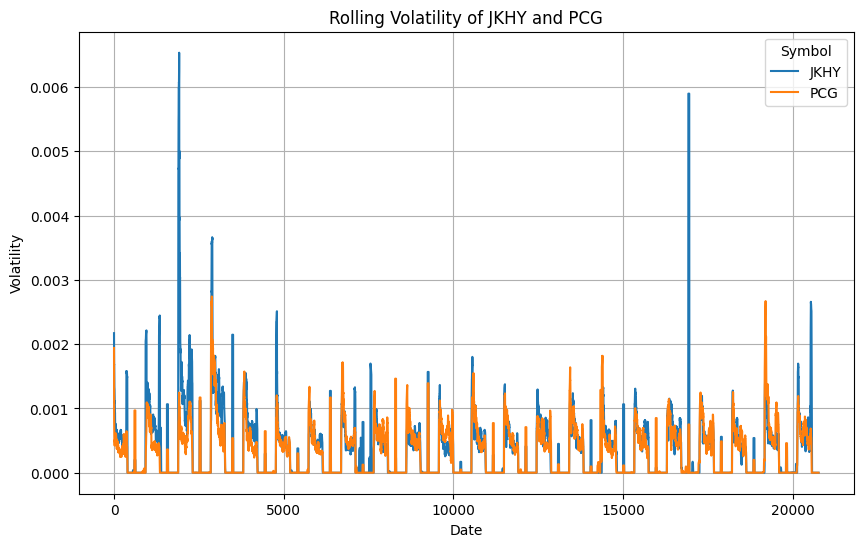

In [10]:
returns = selected_symbols.pct_change().dropna()

# Calculate rolling volatility (standard deviation) with a window of 30 minutes
window_size = 30  # you can adjust the window size as needed
volatility = returns.rolling(window=window_size).std()

volatility = volatility.dropna()
volatility = volatility.reset_index(drop=True)

# Plot the rolling volatility for JKHY and PCG
plt.figure(figsize=(10, 6))
plt.plot(volatility.index, volatility['JKHY'], label='JKHY')
plt.plot(volatility.index, volatility['PCG'], label='PCG')
plt.title('Rolling Volatility of JKHY and PCG')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.legend(title='Symbol')
plt.show()